In [39]:
from PIL import Image
import os
import matplotlib.pyplot as plt

In [40]:
folders = [
    "data/Kather_texture_2016_image_tiles_5000/01_TUMOR",
    "data/Kather_texture_2016_image_tiles_5000/02_STROMA",
    "data/Kather_texture_2016_image_tiles_5000/03_COMPLEX",
    "data/Kather_texture_2016_image_tiles_5000/04_LYMPHO",
    "data/Kather_texture_2016_image_tiles_5000/05_DEBRIS",
    "data/Kather_texture_2016_image_tiles_5000/06_MUCOSA",
    "data/Kather_texture_2016_image_tiles_5000/07_ADIPOSE",
    "data/Kather_texture_2016_image_tiles_5000/08_EMPTY"
]

In [43]:
for folder_path in folders:
    num_images = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".tif"):
            num_images += 1

    print("Number of images in ", folder_path, ":", num_images)

Number of images in  data/Kather_texture_2016_image_tiles_5000/01_TUMOR : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/02_STROMA : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/03_COMPLEX : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/04_LYMPHO : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/05_DEBRIS : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/06_MUCOSA : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/07_ADIPOSE : 625
Number of images in  data/Kather_texture_2016_image_tiles_5000/08_EMPTY : 625


In [45]:
for folder_path in folders:
    for filename in os.listdir(folder_path):
        if filename.endswith(".tif"):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as image:
                width, height = image.size
                if width != 150 or height != 150:
                    print("Error: image", filename, "has size", width, "x", height)

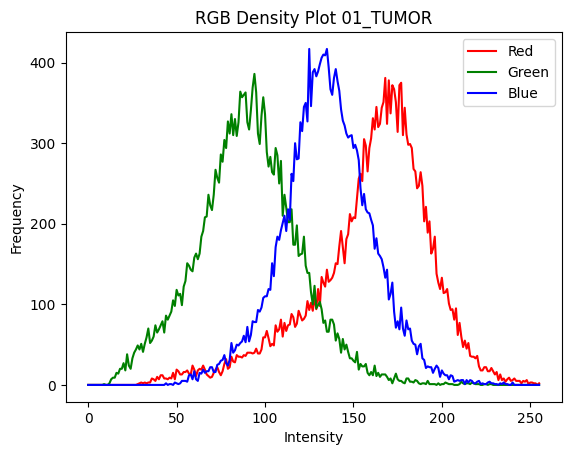

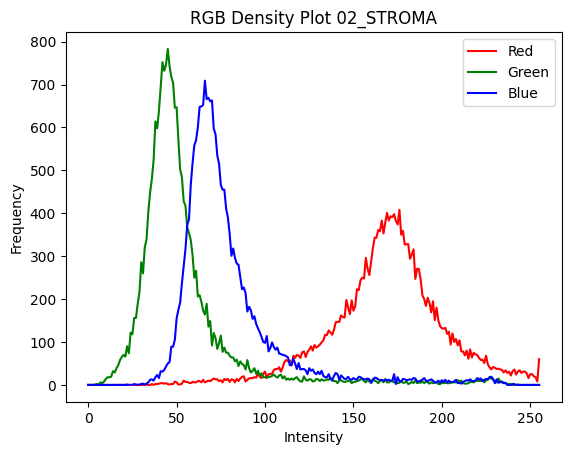

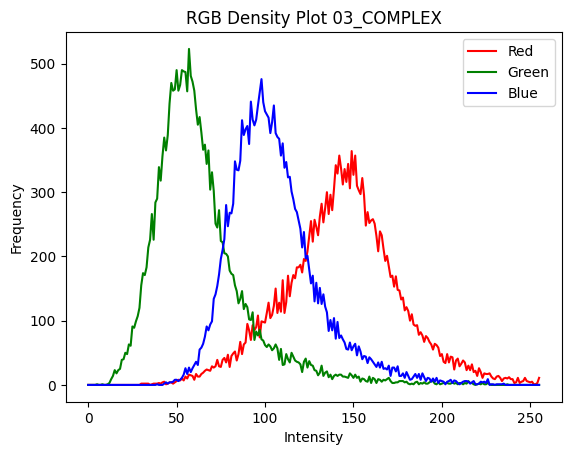

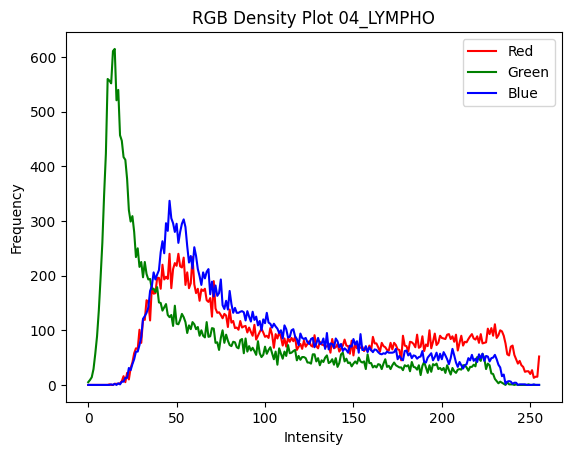

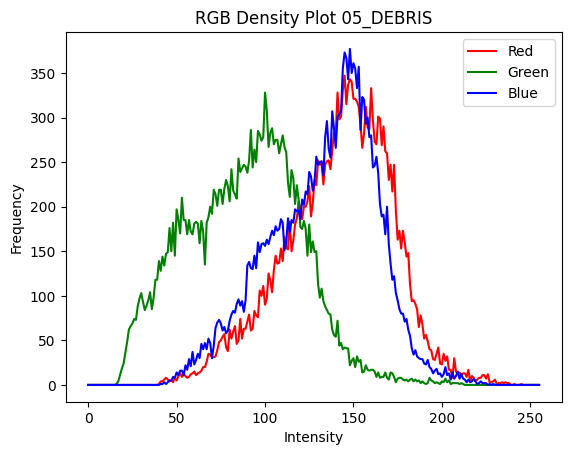

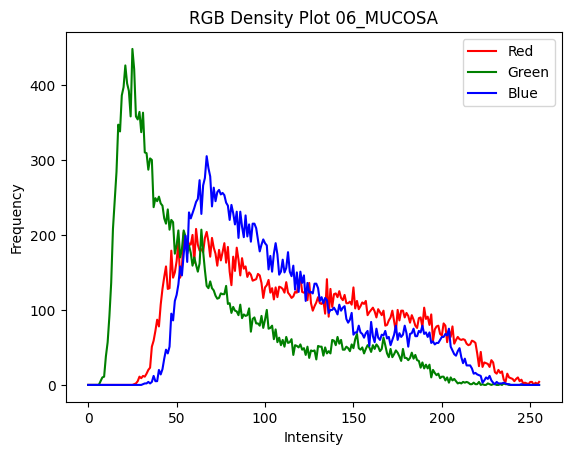

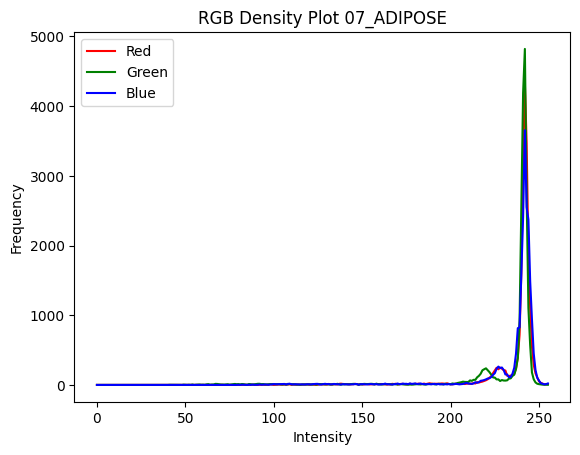

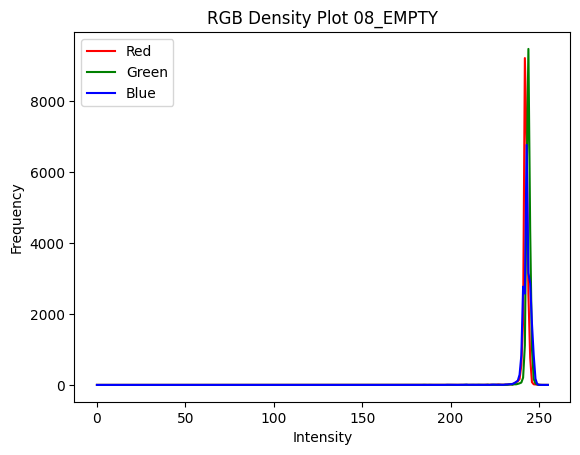

In [42]:
for folder_path in folders:
    red_densities = []
    green_densities = []
    blue_densities = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".tif"):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            image = image.convert("RGB")
            histogram = image.histogram()
            red_density = histogram[0:256]
            green_density = histogram[256:512]
            blue_density = histogram[512:768]
            red_densities.append(red_density)
            green_densities.append(green_density)
            blue_densities.append(blue_density)

            plt.plot(red_densities[-1], color='red', label='Red')
        plt.plot(green_densities[-1], color='green', label='Green')
        plt.plot(blue_densities[-1], color='blue', label='Blue')

        plt.title('RGB Density Plot ' + os.path.basename(folder_path))
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

        plt.legend()
        plt.show()
        break